
**Use a machine Learning Algorithm that can Determine the existence of kyphosis after surgery**

**Data Description:**
- Kyphosis is a spinal disorder in which an excessive curve of the spine results in an abnormal rounding of the upper back.
- The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery

- Kyphosis: A factor with levels absent/present indicating if a kyphosis was present after the operation.
- Age: In months
- Number: The number of vertebrae involved
- Start: The number of the first (topmost) vertebra operated on.

**Expected output**
- **Use both random forest and Dicision tree algorithms**
- Interpret both algorithm results
- Perform pairplot for visualisation
- Find out all the mentioned points for random forest and decision tree:
- Evaluate the model
- Confusion matrix
- Accuracy
- Misclassification rate

- To download the dataset click here <a href="https://drive.google.com/file/d/1fqs1XtLg9zJt0W3TJRQ0XwSiSAs1Q7eT/view?usp=sharing" title="Google Drive">Click here</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [13]:
# Load the dataset
df = pd.read_csv('kyphosis.csv')

# Display the first few rows
print(df.head())

  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB
None


In [16]:
# Check for missing values 
print(df.isnull().sum()) 

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64


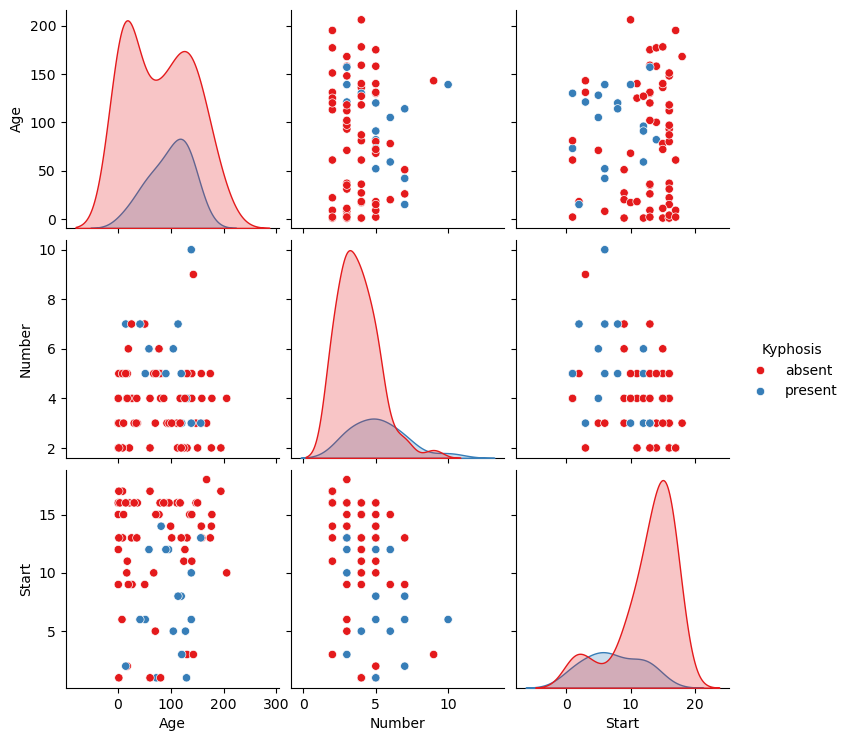

In [17]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')
plt.show()

In [18]:
# Check the distribution of the target variable
print(df['Kyphosis'].value_counts())

Kyphosis
absent     64
present    17
Name: count, dtype: int64


In [19]:
# Encode 'Kyphosis' column: 'absent' as 0 and 'present' as 1
df['Kyphosis'] = df['Kyphosis'].map({'absent': 0, 'present': 1})

# Define features (X) and target (y)
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dt = dtree.predict(X_test)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Misclassification Rate
misclassification_rate_dt = 1 - accuracy_dt
print("Misclassification Rate:", misclassification_rate_dt)


Confusion Matrix:
 [[18  2]
 [ 3  2]]
Accuracy: 0.8
Misclassification Rate: 0.19999999999999996


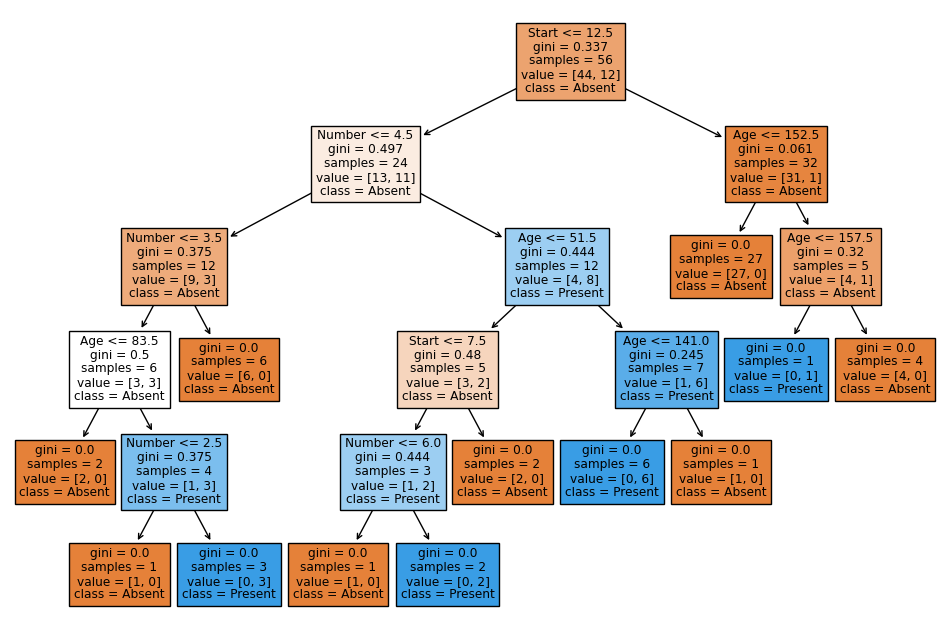

In [20]:
plt.figure(figsize=(12,8))
plot_tree(dtree, feature_names=X.columns, class_names=['Absent', 'Present'], filled=True)
plt.show()


In [21]:
# Initialize the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions
y_pred_rf = rfc.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Misclassification Rate
misclassification_rate_rf = 1 - accuracy_rf
print("Misclassification Rate:", misclassification_rate_rf)


Confusion Matrix:
 [[18  2]
 [ 3  2]]
Accuracy: 0.8
Misclassification Rate: 0.19999999999999996


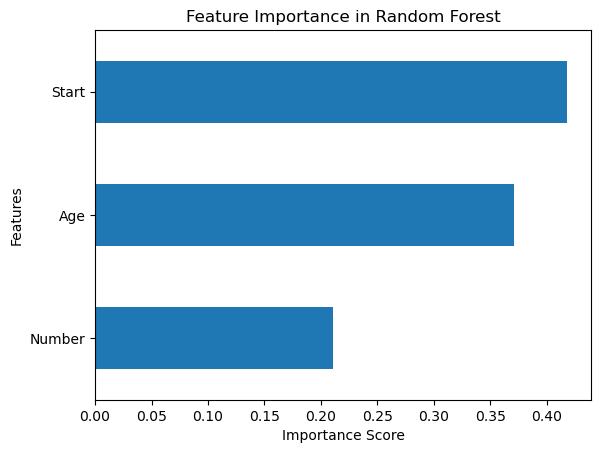

In [22]:
# Feature importance
importances = rfc.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plotting feature importance
forest_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
